In [3]:
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [4]:
listings = pd.read_csv('Boston_Airbnb/listings_detailed.csv')
room_codes = [i.split('/')[-1] for i in listings['listing_url'].values]

In [5]:
features = pickle.load(open('Boston_images_features.pkl','rb'))

In [6]:
## process
features_df = []
for k in tqdm(features.keys()):
    feature = features[k]

    feature_dict = {}
    feature_dict['room_code'] = k
    for i in feature.keys():
        if not i=='hist':
            feature_dict[i] = feature[i]
        else:
            v = feature['hist']
            try:
                for count,ii in enumerate(v):
                    feature_dict[f'hist_{count+1}'] = ii
            except:
                continue
    
    features_df.append(feature_dict)


100%|██████████| 3352/3352 [00:00<00:00, 8196.62it/s]


In [7]:
features_df = pd.DataFrame(features_df)
features_df['room_code'] = features_df['room_code'].astype('int')

In [9]:
features_df

,room_code,size,sharpness,mean_brightness,contrast,dissimilarity,homogeneity,energy,correlation,num_contours,...,hist_503,hist_504,hist_505,hist_506,hist_507,hist_508,hist_509,hist_510,hist_511,hist_512
0,3781,3015475.2,881.897843,150.882816,673.910122,12.238382,0.256013,0.054422,0.901074,5510.2,...,0.046727,0.003120,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000049,0.056148,0.505568
1,5506,1514023.2,1851.470725,161.862361,1714.806113,17.929735,0.292324,0.073237,0.828022,3066.8,...,0.057282,0.027155,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.001133,0.104923,0.583835
2,6695,10148896.0,147.462248,134.363897,338.597903,7.961517,0.344553,0.028638,0.962088,13244.2,...,0.019690,0.002241,2.378732e-07,1.585821e-07,2.274869e-07,0.000003,0.000047,0.004080,0.041520,0.231650
3,2014651,2160081.6,542.848184,141.541228,2120.399934,18.498034,0.460574,0.241349,0.799896,2675.0,...,0.017018,0.002916,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000012,0.000015,0.006767,0.494228
4,2014882,12341000.0,302.560886,156.195685,363.141913,8.711843,0.314192,0.028268,0.954195,22519.2,...,0.054422,0.001917,4.353832e-06,2.741668e-06,1.147577e-05,0.000046,0.000274,0.002013,0.077765,0.219567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,1810397,9934240.0,3857.238432,99.873045,854.798224,13.971295,0.192149,0.017667,0.895303,20886.2,...,0.009415,0.000281,2.196482e-06,1.275273e-06,1.961743e-06,0.000004,0.000019,0.000207,0.044470,0.085578
3348,1819994,15136358.4,209.792148,90.794576,1010.475622,10.331341,0.257115,0.022981,0.895213,20464.6,...,0.006768,0.000077,6.918480e-06,4.793195e-06,6.330635e-06,0.000006,0.000006,0.000010,0.007667,0.069447
3349,1886037,467680.0,202.750518,201.530008,1071.552902,10.714037,0.544719,0.248548,0.850184,305.5,...,0.014269,0.006585,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.003319,0.617009
3350,1956275,615510.0,797.297177,125.254810,2241.312946,20.346319,0.385714,0.184059,0.797026,2569.0,...,0.003921,0.000015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000008,0.009118,0.300986


In [8]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [11]:
data = pd.merge(
    listings[['id','price','longitude','latitude']].rename(columns={'id':'room_code'}),
    features_df,
    left_on='room_code',right_on='room_code',
    how='right'
)

In [12]:
data['price'] = [float(i.split('.')[0][1:].replace(',','')) for i in data['price'].values]


In [13]:
data = data.fillna(-1)

In [14]:
data.shape

(3352, 528)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# from 

X = data.iloc[:,2:]
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model = RandomForestRegressor().fit(X_train,y_train)

r2_score(
    model.predict(X_test),
    y_test
)


-14.074919226582864

## unsupervised

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data.iloc[:,2:])
pcs = pca.transform(data.iloc[:,2:])

In [14]:
pca.explained_variance_ratio_

array([9.99169310e-01, 8.25564061e-04])

<Axes: >

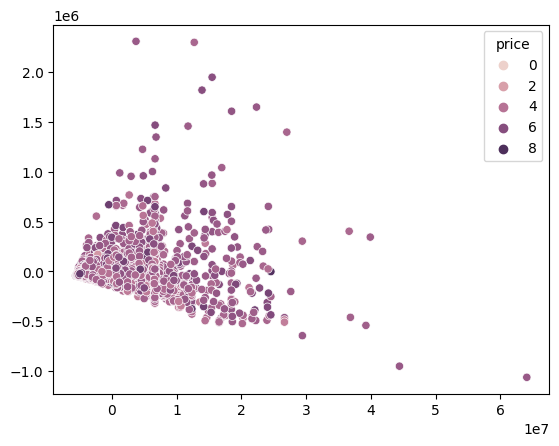

In [15]:
sns.scatterplot(
    x=pcs[:,0],
    y=pcs[:,1],
    hue = np.log(data['price']+1)
)



In [16]:
pca.components_

array([[-2.00170769e-10, -3.54674377e-10,  9.99730442e-01, ...,
         3.26198528e-10,  4.67391340e-10, -6.06547523e-09],
       [-7.71927288e-09,  3.07494852e-09, -2.32041957e-02, ...,
         4.35979268e-09,  1.85053496e-08,  3.35111741e-08]])

In [17]:
data

,room_code,price,longitude,latitude,size,sharpness,mean_brightness,contrast,dissimilarity,homogeneity,...,hist_503,hist_504,hist_505,hist_506,hist_507,hist_508,hist_509,hist_510,hist_511,hist_512
0,3781,132.0,-71.02991,42.36413,3015475.2,881.897843,150.882816,673.910122,12.238382,0.256013,...,0.046727,0.003120,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000049,0.056148,0.505568
1,5506,99.0,-71.09581,42.32844,1514023.2,1851.470725,161.862361,1714.806113,17.929735,0.292324,...,0.057282,0.027155,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.001133,0.104923,0.583835
2,6695,230.0,-71.09387,42.32802,10148896.0,147.462248,134.363897,338.597903,7.961517,0.344553,...,0.019690,0.002241,2.378732e-07,1.585821e-07,2.274869e-07,0.000003,0.000047,0.004080,0.041520,0.231650
3,2014651,120.0,-71.10733,42.30593,2160081.6,542.848184,141.541228,2120.399934,18.498034,0.460574,...,0.017018,0.002916,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000012,0.000015,0.006767,0.494228
4,2014882,75.0,-71.15758,42.34245,12341000.0,302.560886,156.195685,363.141913,8.711843,0.314192,...,0.054422,0.001917,4.353832e-06,2.741668e-06,1.147577e-05,0.000046,0.000274,0.002013,0.077765,0.219567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,1810397,995.0,-71.07110,42.34279,9934240.0,3857.238432,99.873045,854.798224,13.971295,0.192149,...,0.009415,0.000281,2.196482e-06,1.275273e-06,1.961743e-06,0.000004,0.000019,0.000207,0.044470,0.085578
3348,1819994,275.0,-71.09476,42.34981,15136358.4,209.792148,90.794576,1010.475622,10.331341,0.257115,...,0.006768,0.000077,6.918480e-06,4.793195e-06,6.330635e-06,0.000006,0.000006,0.000010,0.007667,0.069447
3349,1886037,239.0,-71.07170,42.35985,467680.0,202.750518,201.530008,1071.552902,10.714037,0.544719,...,0.014269,0.006585,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.003319,0.617009
3350,1956275,1299.0,-71.12378,42.30790,615510.0,797.297177,125.254810,2241.312946,20.346319,0.385714,...,0.003921,0.000015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000008,0.009118,0.300986


In [18]:
listings[['id','price']].rename(columns={'id':'room_code'})

,room_code,price
0,3781,$132.00
1,5506,$99.00
2,6695,$230.00
3,2014651,$120.00
4,2014882,$75.00
...,...,...
3698,1810397,$995.00
3699,1819994,$275.00
3700,1886037,$239.00
3701,1956275,"$1,299.00"


## Is expensive one more bright?

<Axes: xlabel='mean_brightness', ylabel='price'>

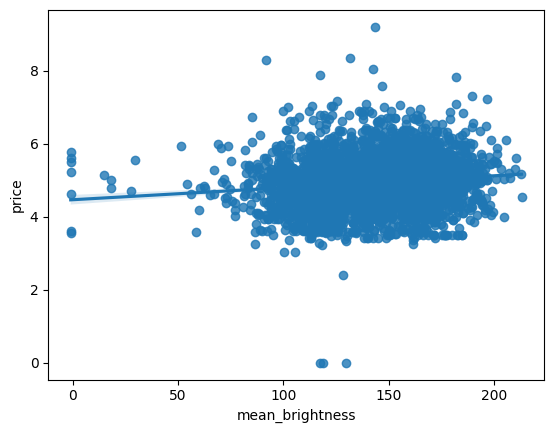

In [19]:
sns.regplot(x=data.mean_brightness,
            y=np.log(data.price+1))

(-0.1, 0.8)

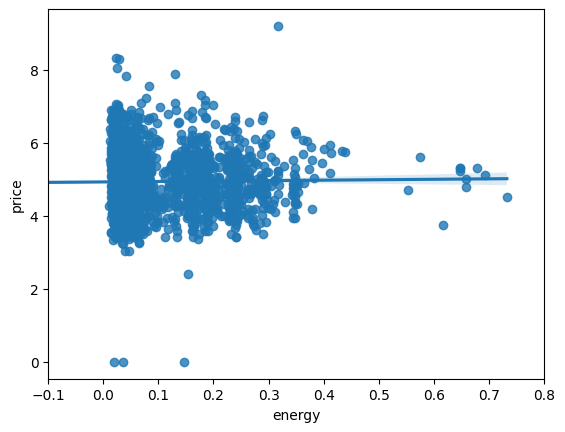

In [24]:
sns.regplot(x=data.energy,
            y=np.log(data.price+1))
plt.xlim(-0.1,0.8)

In [15]:
import statsmodels.api as sm
X= data[['contrast','energy','mean_brightness']].values
X = sm.add_constant(X)
y = np.log(data.price+1).values.reshape(-1,1)
sm.OLS(y,X).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     38.51
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.85e-24
Time:                        15:49:48   Log-Likelihood:                -3530.1
No. Observations:                3352   AIC:                             7068.
Df Residuals:                    3348   BIC:                             7093.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2260      0.071     59.224      0.000       4.086       4.366
x1             0.0002   2.52e-05      7.635      0.000       0.000       0.000
x2            -0.9011      0.178     -5.074      0.000      -1.249      -0.553
x3             0.0043      0.000      9.420      0.000       0.003       0.005
==============================================================================
Omnibus:                      261.020   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1425.955
Skew:                           0.100   Prob(JB):                    2.28e-310
Kurtosis:                       6.189   Cond. No.                     1.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
import torch
torch.hub.list()

TypeError: list() missing 1 required positional argument: 'github'